##### 【 의사결정나무 알고리즘 - DT 】
- iris(붓꽃) 품종 분류 모델
- 학습종류 : 지도학습 - 분류
- 학습방법 : DT기반 분류

[1] 모듈 로딩 및 데이터 준비 <hr>
- [1-1] 모듈 로딩
- [1-2] 데이터 준비

In [23]:
## ======================================================
## 모듈 불러오기
## ======================================================
import pandas as pd
import numpy as np

## ML학습 관련
from sklearn.tree import DecisionTreeClassifier

## ML 데이터셋 및 전처리 관련
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder

## ML 성능지표 관련
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report

## 시각화 관련
import matplotlib.pyplot as plt
import graphviz

In [31]:
DATA_FILE = '../Data/iris.csv'

irisDF = pd.read_csv(DATA_FILE)
irisDF.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


[2] 학습 준비<hr>
- [2-1] 피쳐/타겟 분리
- [2-2] 학습용/테스트용 분리
- [2-3] 수치형 피쳐 스케일링

In [32]:
featureDF = irisDF[irisDF.columns[:-1]]
targetSR  = irisDF[irisDF.columns[-1]]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=42, stratify=targetSR)

In [19]:
scaler = RobustScaler()
scaler.fit(x_train)

rb_x_train = scaler.transform(x_train)
rb_x_test  = scaler.transform(x_test)

In [12]:
## ================================================
## 범주형 타겟 전처리 => 인코딩
## ================================================
lbEncoder  = LabelEncoder()
en_y_train = lbEncoder.fit_transform(y_train)
en_y_test  = lbEncoder.transform(y_test)

print(f'[en_y_train] en_y_train:{en_y_train.shape}\n{type(en_y_train)}\n{en_y_train[:3]} ')

[en_y_train] en_y_train:(120,)
<class 'numpy.ndarray'>
[0 2 1] 


[3] 학습 진행

In [ ]:
## 모델 인스턴스 생성
treeModel = DecisionTreeClassifier(random_state=42)

## 학습 진행 : 학습용 데이터 셋
treeModel.fit(rb_x_train, en_y_train)
#treeModel.fit(x_train, en_y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
## 모델 파라미터 확인   :   .fit()학습 후 세팅되는 파라미터들 즉, 데이터셋과 관련된 것들
##                       모델 파라미터 확인 => 파라미터이름_
print(f' ===[모델 파라미터들]=== ')
print(f'classes_                : {treeModel.classes_}')
print(f'n_classes_              : {treeModel.n_classes_}')
print(f'n_features_in_          : {treeModel.n_features_in_}')

## => 데이터셋에서 타겟관련 중요피쳐 찾기에 적합한 모델 파라미터
print(f'feature_names_in_       : {treeModel.feature_importances_}')

 ===[모델 파라미터들]=== 
classes_                : [0 1 2]
n_classes_              : 3
n_features_in_          : 4
feature_names_in_       : [0.00625    0.02916667 0.5585683  0.40601504]


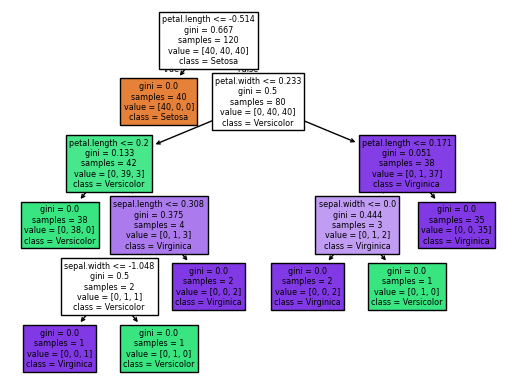

In [ ]:
## ==================================================
## 학습 완료 후 모델 시각화
## ==================================================
from sklearn import tree

tree.plot_tree(treeModel,
               feature_names=irisDF.columns[:-1],
               class_names=lbEncoder.classes_.tolist(),
               label='all',
               max_depth=2,
               filled=True)
plt.show()

In [45]:
## ==================================================
## 학습 완료 후 모델 시각화 => by Graphviz
## ==================================================
from sklearn.tree import export_graphviz


export_graphviz(treeModel, out_file='iris_tree.dot')

In [43]:
## ==================================================
## 학습 완료 후 트리 모델 구조 텍스트
## ==================================================
## 트리 구조 설명
tree_text = tree.export_text(treeModel,
                             feature_names=irisDF.columns[:-1],
                             class_names = lbEncoder.classes_.tolist(),
                             show_weights=True)

print(tree_text)

|--- petal.length <= -0.51
|   |--- weights: [40.00, 0.00, 0.00] class: Setosa
|--- petal.length >  -0.51
|   |--- petal.width <= 0.23
|   |   |--- petal.length <= 0.20
|   |   |   |--- weights: [0.00, 38.00, 0.00] class: Versicolor
|   |   |--- petal.length >  0.20
|   |   |   |--- sepal.length <= 0.31
|   |   |   |   |--- sepal.width <= -1.05
|   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: Virginica
|   |   |   |   |--- sepal.width >  -1.05
|   |   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: Versicolor
|   |   |   |--- sepal.length >  0.31
|   |   |   |   |--- weights: [0.00, 0.00, 2.00] class: Virginica
|   |--- petal.width >  0.23
|   |   |--- petal.length <= 0.17
|   |   |   |--- sepal.width <= 0.00
|   |   |   |   |--- weights: [0.00, 0.00, 2.00] class: Virginica
|   |   |   |--- sepal.width >  0.00
|   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: Versicolor
|   |   |--- petal.length >  0.17
|   |   |   |--- weights: [0.00, 0.00, 35.00] class: Virginica

[4] 학습평가 <hr>
- 평가지표 결정 
    * 데이터셋의 균형/불균형 => 평균 계산 방식 : 균형(micro), 불균형(macro, weighted)
    * 평가지표 종류 => accuracy, precision, recall, f1-score

In [36]:
## ===============================================================
## [4-1] 스케일링 적용된 경우 성능평가
## ===============================================================
## => 테스트 데이터에 대한 예측값 추출
pre_y = treeModel.predict(rb_x_test)

## => 성능평가 : 함수들(1D_정답타겟, 1D_예측)
accu_ = accuracy_score(en_y_test, pre_y)

## => 다중클래스분류(Multi-class)경우 평균 계산방식 지정
prec_= precision_score(en_y_test, pre_y, average='micro')
reca_= recall_score(en_y_test, pre_y, average='micro')
f1sc_= f1_score(en_y_test, pre_y, average='micro')

print(f'=== [스케일링데이터+모델 성능평가] ===')
print(f'accuracy   : {accu_}')
print(f'precision  : {prec_}')
print(f'recall     : {reca_}')
print(f'f1-score   : {f1sc_}')

## => 분류 결과 보고서
reports = classification_report(en_y_test,
                                pre_y,
                                target_names=lbEncoder.classes_to.list())
print(reports)

=== [스케일링데이터+모델 성능평가] ===
accuracy   : 0.9333333333333333
precision  : 0.9333333333333333
recall     : 0.9333333333333333
f1-score   : 0.9333333333333333


AttributeError: 'LabelEncoder' object has no attribute 'classes_to'

In [ ]:
lbEncoder.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)